Data & kaggle_note: https://www.kaggle.com/harlfoxem/housesalesprediction

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
#Importing DataSet 
dataset = pd.read_csv("kc_house_data.csv")
#Keggle note 우측 데이터 "kc_house_data.csv" click 후 path 복사

# 데이터 파악하기 

In [8]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
dataset.shape

(21613, 21)

In [10]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
dataset['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

# EDA(Exploratory Data Analysis)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


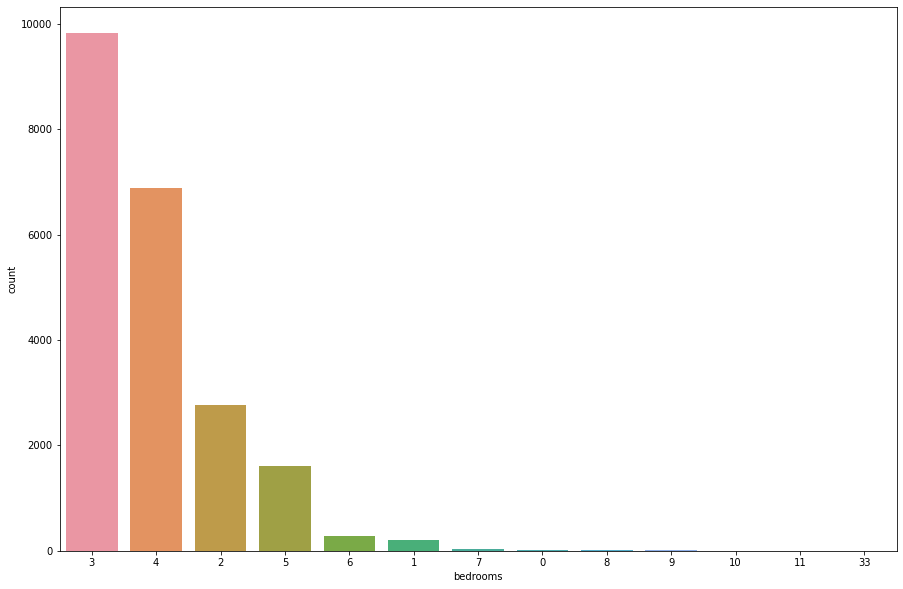

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.countplot(dataset.bedrooms,order=dataset['bedrooms'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


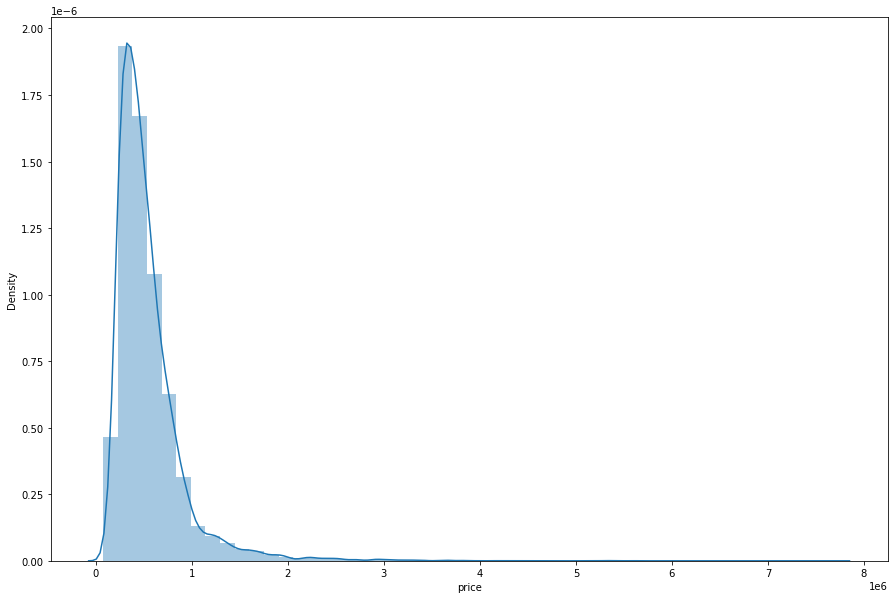

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(dataset['price'],hist=True,kde=True,rug=False,label='price',norm_hist=True)

In [17]:
variables = dataset[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

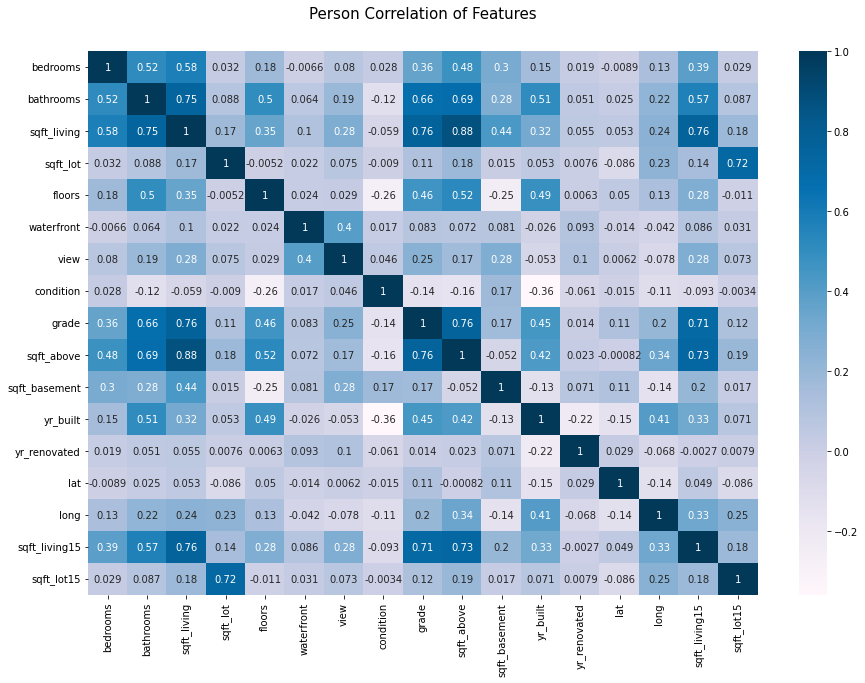

In [18]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(15, 10)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(variables.astype(float).corr(), linecolor = "white", cmap = colormap, annot = True)
            #, linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, 
         #   linecolor = "white", annot = True, annot_kws = {"size" : 16})


 - 독립 변수간 상관 관계를 보이는 것을 다중공선성(Multicollinearity)이라 하며, 다중공선성이 있으면 부정확한 회귀 결과가 도출됨
 - X는 Y와 상관관계가 높아야 하고 독립변수끼리 상관관계가 없어야 비교적 정확한 결과를 얻을 수 있음
 -- 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있음
 -- 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있음

# 다중공선성 변수 제거

In [19]:
#데이터 확인
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
# bedroom이 종속변수인 price에 영향을 미치는 관계를 구하기 위한 회귀분석 (다른 변수의 영향을 받지 않았을 때)

dataset['intercept'] = 1
pm = sm.OLS(dataset['price'], dataset[['intercept','bedrooms']])
results_p = pm.fit()
results_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2271.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:36:52   Log-Likelihood:            -3.0652e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.298e+05   8931.866     14.533      0.000    1.12e+05    1.47e+05
bedrooms    1.217e+05   2554.304     47.651      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18859.406   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1199044.960
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      38.644   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 - bedroom이 많을 수록 price가 비싸다는 양의 회귀계수가 도출 됨(다른 변수의 영향을 받지 않았을 때)

In [21]:
'''
#상관관계가 높은 변수를 제거하지 않고 모든 변수를 input으로 사용했을 때(다중공선성 고려 X)
dataset['intercept'] = 1
lm = sm.OLS(dataset['price'], dataset[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15']])
results = lm.fit()
results.summary()
'''

"\n#상관관계가 높은 변수를 제거하지 않고 모든 변수를 input으로 사용했을 때(다중공선성 고려 X)\ndataset['intercept'] = 1\nlm = sm.OLS(dataset['price'], dataset[['bedrooms', 'bathrooms', 'sqft_living',\n       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',\n       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', \n       'lat', 'long', 'sqft_living15', 'sqft_lot15']])\nresults = lm.fit()\nresults.summary()\n"

 - 변수가 많아질수록 다중공선성의 발생으로 회귀결과가 잘못 도출 될 수 있음
 - bedrooms coef = -3.549e+04 : bedroom이 많을 수록 price가 떨어진다는 이상한 결과가 도출됨
 - 이처럼 다중공선성이 있다면 회귀 결과를 왜곡하게 됨, 따라서 서로 상관관계가 높은 변수들 중 하나를 제거해야 함


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
'''
pd.DataFrame({'column': column, 'VIF': variance_inflation_factor(lm.exog, i)} 
             for i, column in enumerate(lm.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.
'''

"\npd.DataFrame({'column': column, 'VIF': variance_inflation_factor(lm.exog, i)} \n             for i, column in enumerate(lm.exog_names)\n             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.\n"

In [24]:
# 다중공선성을 고려하여 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15'  변수 제거
dataset['intercept'] = 1
lm_re = sm.OLS(dataset['price'], dataset[['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']])
results_re = lm_re.fit()
results_re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          1.495e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                        0.00
Time:                        18:36:52   Log-Likelihood:                     -2.9678e+05
No. Observations:               21613   AIC:                                  5.936e+05
Df Residuals:                   21602   BIC:                                  5.937e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       1.995e+04   1833.847     10.879      0.000    1.64e+04    2.35e+04
floors         6.542e+04   3602.554     18.161      0.000    5.84e+04    7.25e+04
waterfront     6.266e+05   1.92e+04     32.683      0.000    5.89e+05    6.64e+05
view           6.134e+04   2321.914     26.416      0.000    5.68e+04    6.59e+04
condition      2.788e+04   2561.926     10.881      0.000    2.29e+04    3.29e+04
grade          1.906e+05   1730.662    110.107      0.000    1.87e+05    1.94e+05
sqft_basement   107.8957      4.056     26.599      0.000      99.945     115.846
yr_built      -2741.4062     66.010    -41.530      0.000   -2870.791   -2612.022
yr_renovated     29.3489      3.982      7.370      0.000      21.544      37.154
lat            4.959e+05    1.1e+04     45.213      0.000    4.74e+05    5.17e+05
long           1.588e+05   4471.649     35.523      0.000     1.5e+05    1.68e+05
==============================================================================
Omnibus:                    21287.185   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3320421.877
Skew:                           4.432   Prob(JB):                         0.00
Kurtosis:                      63.071   Cond. No.                     2.54e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
X = dataset[['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']]
y = dataset['price']

In [27]:
# Train, Test set 80:20 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#Random_state :난수 값을 고정하는 역할

# 다중 선형회귀모델 학습 및 예측

In [28]:
# 회귀모델 학습, 적합


y(price) = -13543932.428068105 + 2.43119521e+04X1 + 1.99257992e-01X2 + 5.95084840e+04X3 + .... + 1.59292252e-02X13

In [29]:
# X_test set 에 대한 예측 결과


In [30]:
'''
pd.options.display.float_format = '{:.5f}'.format

#실제 y값과 예측 값 비교
y_compare={'y_test':y_test, 'y_predicted':y_pred}
pd.DataFrame(y_compare)
'''

"\npd.options.display.float_format = '{:.5f}'.format\n\n#실제 y값과 예측 값 비교\ny_compare={'y_test':y_test, 'y_predicted':y_pred}\npd.DataFrame(y_compare)\n"

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#print("mean_squared_error: ", mean_squared_error())
#print("root_mean_squared_error: ", mean_squared_error(,squared=False))
#print("mean_absolute_error: ", mean_absolute_error())

-- MSE
- 실제 값과 예측 값의 차이를 제곱해 평균화

- 예측값과 실제값 차이의 면적의 합

- 특이값이 존재하면 수치가 많이 늘어난다.

--RMSE
- MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 쓴다.

- 에러에 제곱을 하기 때문에 에러가 크면 클수록 그에 따른 가중치가 높이 반영된다. 그러므로 예측 결과물의 에러가 10이 나온 것이 5로 나온 것보다, 정확히 2^2(4)배가 나쁜 도메인에서 쓰기 적합한 산식이다.

- 에러에 따른 손실이 기하 급수적으로 올라가는 상황에서 쓰기 적합하다.

-- MAE
- 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화

- MAE는 에러에 절대값을 취하기 때문에 에러의 크기 그대로 반영된다. 그러므로 예측 결과물의 에러가 10이 나온 것이 5로 나온 것보다 2배가 나쁜 도메인에서 쓰기 적합한 산식이다.

- 에러에 따른 손실이 선형적으로 올라갈 때 적합하다.

- 이상치가 많을 때

In [32]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    


--MAPE
- MAE를 퍼센트로 변환